# Data Results 2.0 #

##  **Importing the necessary libraries and overview of the dataset**

In [1]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import math
from scipy.stats import norm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display, Math

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("compileddata.csv")

# Copying data to another variable to avoid any changes to the original data
df = data.copy()

### Numeric Values

In [3]:
data.head()

,Company,Region,Country,Sector,Industry,ESG,E,G,S,GC,ROA 2023,Entity Name,gc_262
0,Mahindra & Mahindra Ltd.,Asia,India,Consumer Durables,Motor Vehicles,63.20,64.72,66.12,59.40,69.23,8.64,Axis Bank Ltd.,64.07
1,Gerdau SA,South America,Brazil,Non-Energy Minerals,Steel,59.38,65.18,50.24,57.03,62.92,3.70,Bharti Airtel Ltd.,61.83
2,"CSC Financial Co., Ltd.",Asia,China,Finance,Investment Managers,46.97,45.88,47.25,47.34,63.59,1.25,"Guangzhou Automobile Group Co., Ltd.",63.27
3,MMC Norilsk Nickel PJSC,Europe,Russian Federation,Non-Energy Minerals,Other Metals/Minerals,63.34,66.21,62.05,59.37,61.31,6.90,"Beijing Kingsoft Office Software, Inc.",53.12
4,"Yunnan Baiyao Group Co., Ltd.",Asia,China,Health Technology,Pharmaceuticals: Major,45.18,48.23,42.97,45.09,55.79,4.20,"XCMG Construction Machinery Co., Ltd.",51.76


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      271 non-null    object 
 1   Region       271 non-null    object 
 2   Country      271 non-null    object 
 3   Sector       271 non-null    object 
 4   Industry     271 non-null    object 
 5   ESG          271 non-null    float64
 6   E            271 non-null    float64
 7   G            271 non-null    float64
 8   S            271 non-null    float64
 9   GC           271 non-null    float64
 10  ROA 2023     271 non-null    float64
 11  Entity Name  271 non-null    object 
 12  gc_262       271 non-null    float64
dtypes: float64(7), object(6)
memory usage: 27.6+ KB


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ESG,271.0,51.206531,5.428109,39.50,47.265,50.98,54.910,65.29
E,271.0,54.120849,6.858436,41.59,49.175,53.37,59.080,71.92
G,271.0,48.778672,5.643333,39.80,44.310,47.73,51.965,66.77
S,271.0,49.691919,5.960529,33.83,45.280,49.77,54.075,63.70
GC,271.0,59.628303,6.188879,40.71,55.995,60.46,63.745,72.45
ROA 2023,271.0,4.688192,2.038616,1.20,3.200,4.30,5.700,13.50
gc_262,271.0,59.620590,6.202290,40.71,55.940,60.82,63.795,72.45


### Non-Numeric Values

In [86]:
df.describe(exclude = 'number').T

,count,unique,top,freq
Company,271,271,Godrej Consumer Products Ltd.,1
Region,271,3,Asia,244
Country,271,4,China,194
Sector,271,19,Finance,49
Industry,271,72,Regional Banks,13
Entity Name,271,271,Companhia Paranaense de Energia,1


In [87]:
df['Region'].value_counts()

Region
Asia             244
South America     16
Europe            11
Name: count, dtype: int64

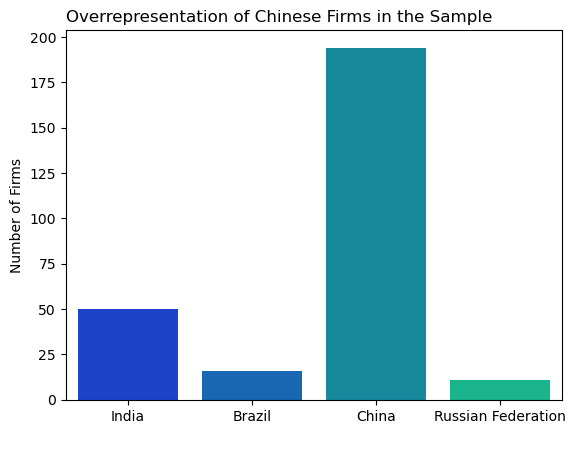

In [150]:
#f, axs = plt.subplots(1, 1, figsize=(5, 3))
sns.countplot(x="Country", data=df, palette="winter")
plt.title('Overrepresentation of Chinese Firms in the Sample', loc='left')
plt.xlabel(" ")
plt.ylabel("Number of Firms")
plt.show()

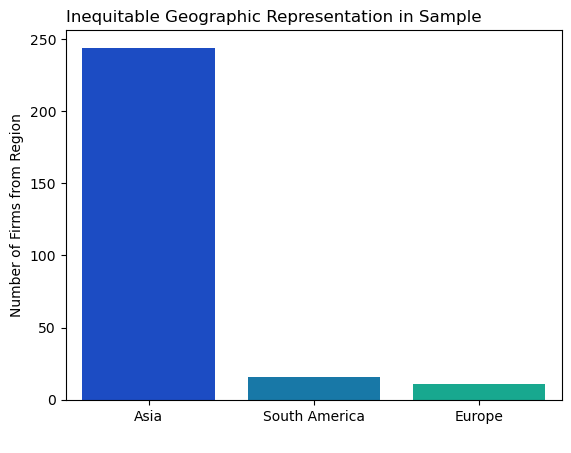

In [152]:
#f, axs = plt.subplots(1, 1, figsize=(5, 3))
sns.countplot(x="Region", data=df, palette="winter")
plt.title('Inequitable Geographic Representation in Sample', loc='left')
plt.xlabel(" ")
plt.ylabel("Number of Firms from Region")
plt.show()

Text(0, 0.5, 'Company Return On Assets \n 2023 Calculation')

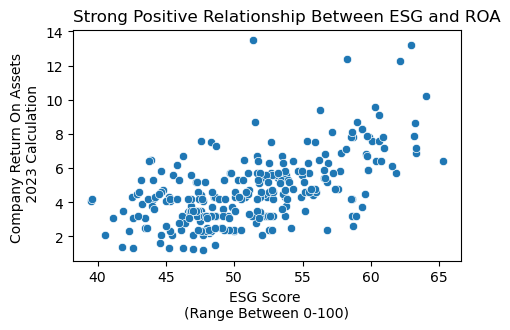

In [138]:
import seaborn as sns
f, axs = plt.subplots(1, 1, figsize=(5, 3))
sns.scatterplot(x="ESG", y="ROA 2023", data=df)

plt.title('Strong Positive Relationship Between ESG and ROA', loc='left')
plt.xlabel("ESG Score \n(Range Between 0-100)")
plt.ylabel("Company Return On Assets \n 2023 Calculation")

In [8]:
import statsmodels.api as sm

### First Regression - Causal Effect of ESG on ROA
$$
ROA_i = \beta_0 + \beta_1 ESG_i + U_i
$$

In [81]:
X = df["ESG"]
Y = df["ROA 2023"]
X_and_constant = sm.add_constant(X)

OLS_result = sm.OLS(Y, X_and_constant)
result1=OLS_result.fit()
beta_0_hat = result.params[0]
beta_1_hat = result.params[1]

Text(0, 0.5, 'Company Return On Assets \n 2023 Calculation')

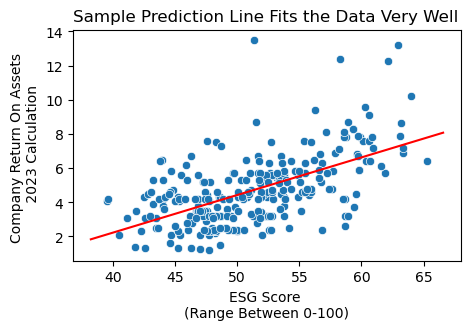

In [140]:
#now plot the predicted line on the graph
f, axs = plt.subplots(1, 1, figsize=(5, 3))

# Step 1: create the scatter plot: str vs testscr
sns.scatterplot(data = df, x = "ESG", y = "ROA 2023", ax=axs)


# Step 2: add the sample regression line
low_x, high_x = axs.get_xlim()
# get the value range (14-26)
x_range = np.linspace(start = low_x, stop = high_x, num = 100)
#get those points
axs.plot(x_range, result1.params["const"] + result1.params["ESG"] * x_range, color="red")
#plot a line between those points and the prediction line

plt.title('Sample Prediction Line Fits the Data Very Well', loc='left')
plt.xlabel("ESG Score \n(Range Between 0-100)")
plt.ylabel("Company Return On Assets \n 2023 Calculation")


In [28]:
print(result1.summary())
print(f"R square is equal to {result1.rsquared}")

                            OLS Regression Results                            
Dep. Variable:               ROA 2023   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           2.15e-26
Time:                        22:55:04   Log-Likelihood:                -520.03
No. Observations:                 271   AIC:                             1044.
Df Residuals:                     269   BIC:                             1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5835      0.955     -6.891      0.0

### 2nd Regression - Causal Effect of GC on ROA
$$
ROA_i = \beta_0 + \beta_1 GC_i + U_i
$$

In [82]:
X = df["GC"]
Y = df["ROA 2023"]
X_and_constant = sm.add_constant(X)

OLS_result2 = sm.OLS(Y, X_and_constant)
result2=OLS_result2.fit()
beta_0_hat2 = result.params[0]
beta_1_hat2 = result.params[1]

Text(0, 0.5, 'Company Return On Assets \n 2023 Calculation')

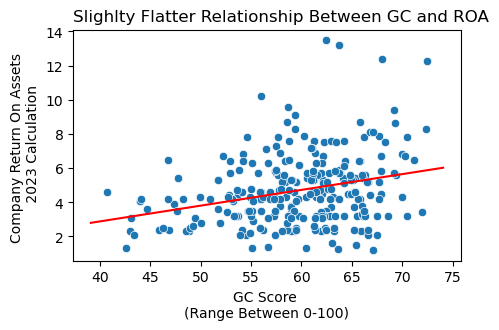

In [141]:
#now plot the predicted line on the graph
f, axs = plt.subplots(1, 1, figsize=(5, 3))

# Step 1: create the scatter plot: str vs testscr
sns.scatterplot(data = df, x = "GC", y = "ROA 2023", ax=axs)


# Step 2: add the sample regression line
low_x, high_x = axs.get_xlim()
# get the value range (14-26)
x_range = np.linspace(start = low_x, stop = high_x, num = 100)
#get those points
axs.plot(x_range, result2.params["const"] + result2.params["GC"] * x_range, color="red")
#plot a line between those points and the prediction line

plt.title('Slighlty Flatter Relationship Between GC and ROA', loc='left')
plt.xlabel("GC Score \n(Range Between 0-100)")
plt.ylabel("Company Return On Assets \n 2023 Calculation")


In [40]:
print(result2.summary())
print(f"R square is equal to {result2.rsquared}")

                            OLS Regression Results                            
Dep. Variable:               ROA 2023   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     22.98
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           2.71e-06
Time:                        23:01:11   Log-Likelihood:                -565.95
No. Observations:                 271   AIC:                             1136.
Df Residuals:                     269   BIC:                             1143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8220      1.156     -0.711      0.4

### 3rd Regression - Causal Effects of Each ESG Factor on ROA:
$$
ROA_i = \beta_0 + \beta_1 ESG_i + \beta_2 E_i + \beta_1 S_i + U_i
$$

In [71]:
X = df[["E", "S","G"]]
X_and_constant = sm.add_constant(X)
Y = df["ROA 2023"]
result3 = sm.OLS(Y, X_and_constant).fit()

beta_0_hat3 = round(result3.params[0], 2)
beta_1_hat3 = round(result3.params[1], 2)
beta_2_hat3 = round(result3.params[2], 2)
beta_3_hat3 = round(result3.params[3], 2)


# print out estimated regression function

print(beta_0_hat3)
print(beta_1_hat3)
print(beta_2_hat3)
print(beta_2_hat3)

-7.2
0.06
0.05
0.05
R square is 0.36426224776576943


In [72]:
print(result3.summary())
print(f"R square is equal to {result3.rsquared}")

                            OLS Regression Results                            
Dep. Variable:               ROA 2023   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     50.99
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           4.34e-26
Time:                        23:31:42   Log-Likelihood:                -515.68
No. Observations:                 271   AIC:                             1039.
Df Residuals:                     267   BIC:                             1054.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2019      0.974     -7.391      0.0

Text(0, 0.5, 'Company Return On Assets \n 2023 Calculation')

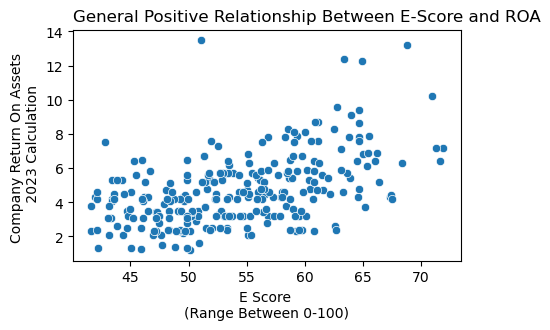

In [142]:
#average annual growth rate (Growth) on the average trade share (TradeShare)
import seaborn as sns
f, axs = plt.subplots(1, 1, figsize=(5, 3))
sns.scatterplot(x="E", y="ROA 2023", data=df)

plt.title('General Positive Relationship Between E-Score and ROA', loc='left')
plt.xlabel("E Score \n(Range Between 0-100)")
plt.ylabel("Company Return On Assets \n 2023 Calculation")

Text(0, 0.5, 'Company Return On Assets \n 2023 Calculation')

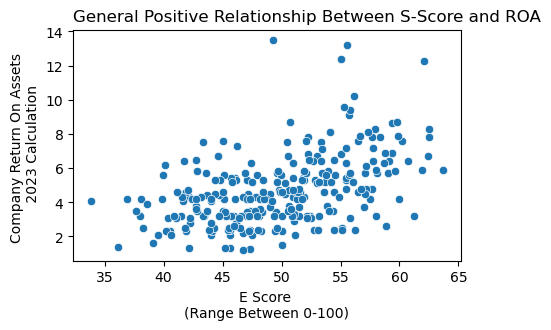

In [143]:
import seaborn as sns
f, axs = plt.subplots(1, 1, figsize=(5, 3))
sns.scatterplot(x="S", y="ROA 2023", data=df)

plt.title('General Positive Relationship Between S-Score and ROA', loc='left')
plt.xlabel("E Score \n(Range Between 0-100)")
plt.ylabel("Company Return On Assets \n 2023 Calculation")

Text(0, 0.5, 'Company Return On Assets \n (2023 Calculation)')

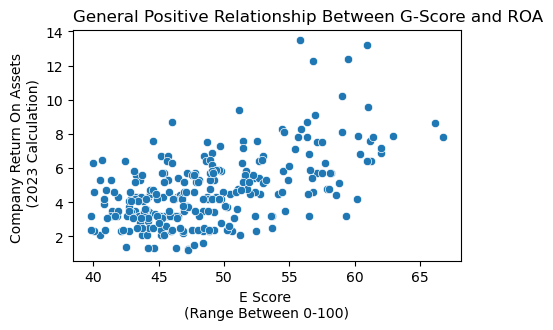

In [145]:
import seaborn as sns
f, axs = plt.subplots(1, 1, figsize=(5, 3))
sns.scatterplot(x="G", y="ROA 2023", data=df)

plt.title('General Positive Relationship Between G-Score and ROA', loc='left')
plt.xlabel("E Score \n(Range Between 0-100)")
plt.ylabel("Company Return On Assets \n (2023 Calculation)")

### 4th Regression - Robustness Test with Exclusion of Finance Industry:
$$
ROA_i = \beta_0 + \beta_1 ESG_i + U_i
$$

In [83]:
#run regression without the finance industry
df_without_Finance = df[df["Sector"] != "Finance"]

X = df_without_Finance["ESG"]
X_and_constant = sm.add_constant(X)
Y = df_without_Finance["ROA 2023"]
OLS_result4 = sm.OLS(Y, X_and_constant)

result4=OLS_result.fit()
beta_0_hat = result.params[0]
beta_1_hat = result.params[1]

print(result4.summary())
print(f"R square is equal to {result4.rsquared}")

                            OLS Regression Results                            
Dep. Variable:               ROA 2023   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           2.15e-26
Time:                        23:36:24   Log-Likelihood:                -520.03
No. Observations:                 271   AIC:                             1044.
Df Residuals:                     269   BIC:                             1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5835      0.955     -6.891      0.0

Text(0, 0.5, 'Company Return On Assets \n 2023 Calculation')

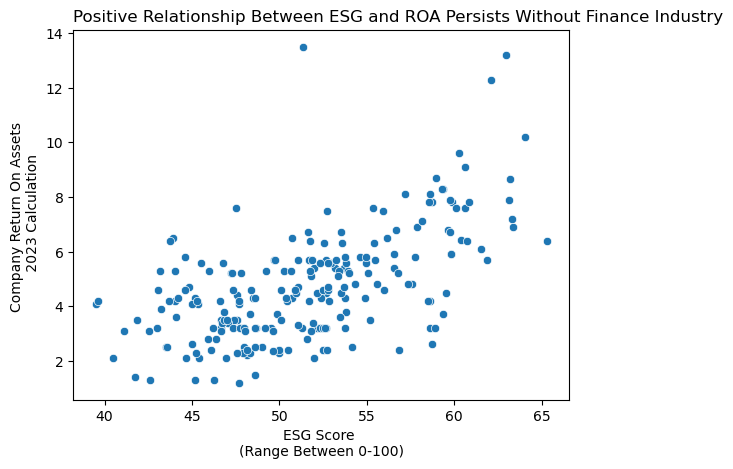

In [146]:
fig, ax = plt.subplots()
sns.scatterplot(x="ESG", y="ROA 2023", data=df_without_Finance, ax=ax)
# Step 2: add the sample regression line
low_x, high_x = axs.get_xlim()
# get the value range (14-26)
x_range = np.linspace(start = low_x, stop = high_x, num = 100)
#get those points
axs.plot(x_range, [beta_0_hat] + [beta_1_hat] * x_range, color="red")
#plot a line between those points and the prediction line

plt.title('Positive Relationship Between ESG and ROA Persists Without Finance Industry', loc='left')
plt.xlabel("ESG Score \n(Range Between 0-100)")
plt.ylabel("Company Return On Assets \n 2023 Calculation")



## Things to do before final
- Add in constants